In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

import wrangle_mall

# Exercises

### Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

- 1. Clustering with the Iris Dataset

    - Using this lesson as a guide, perform clustering on the iris dataset.

    - a. Choose features other than the ones used in the lesson.
    - b. Visualize the results of your clustering.
    - c. Use the elbow method to visually select a good value for k.
    - d. Repeat the clustering, this time with 3 different features.
    
- 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

- 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

***Bonus***

- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data. 
- c) Write down the takeaways from this exercise.

In [2]:
# import data

from pydataset import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


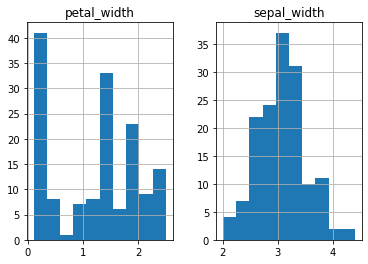

In [5]:
# petal_width and sepal_width distribution

X.hist();

In [6]:
# scale X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
# look at the head

X_scaled.head()

,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


In [8]:
# using KMeans

# define the thing

kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing

kmeans.fit(X_scaled)

# use the thing

kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [9]:
# make a new column names cluster

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
# sample check

iris.sample(10).T

,43,63,99,78,38,21,135,120,30,76
sepal_length,4.4,6.0,5.1,6.7,4.9,5.4,6.1,6.0,4.7,6.6
sepal_width,3.2,2.2,2.5,3.0,3.6,3.4,2.6,2.2,3.2,3.0
petal_length,1.3,4.0,3.0,5.0,1.4,1.7,5.6,5.0,1.6,4.4
petal_width,0.2,1.0,1.1,1.7,0.1,0.2,1.4,1.5,0.2,1.4
species,setosa,versicolor,versicolor,versicolor,setosa,setosa,virginica,virginica,setosa,versicolor
cluster,0,2,2,1,0,0,2,2,0,1


### b. Visualize the results

<Figure size 1008x648 with 0 Axes>

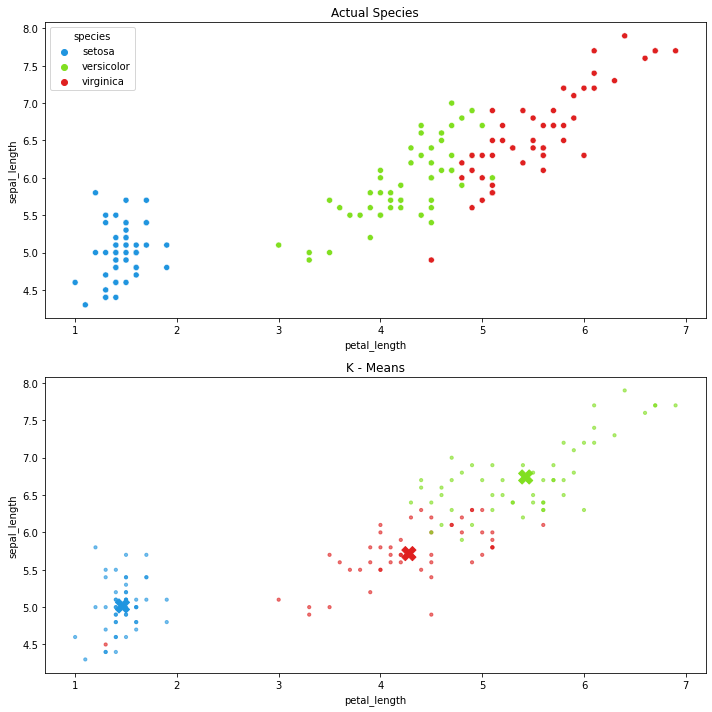

In [55]:
# scatter plot actual vs predicted

plt.figure(figsize=(14, 9))
wrangle_mall.viz_iris(iris, kmeans)

### Attributes for Kmeans :
- clustercenters: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [12]:
# cluster centers - centroids, scaled output

kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.96059584,  0.06891952],
       [ 0.18974112, -1.04776227]])

In [13]:
# make dataframe 

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.960596,0.068920
2,0.189741,-1.047762


In [14]:
# centriods unscaled data

centroids = iris.groupby('cluster')['sepal_length', 'petal_length'].mean()
centroids

,sepal_length,petal_length
cluster,,
0,5.016327,1.465306
1,6.598182,5.349091
2,5.821739,4.297826


In [15]:
# another way for unscaled centroids
# inverse transform function

scaler.inverse_transform(kmeans.cluster_centers_)

array([[0.24489796, 3.45102041],
       [1.92909091, 3.08727273],
       [1.34347826, 2.60217391]])

In [16]:
# labels same as predict

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

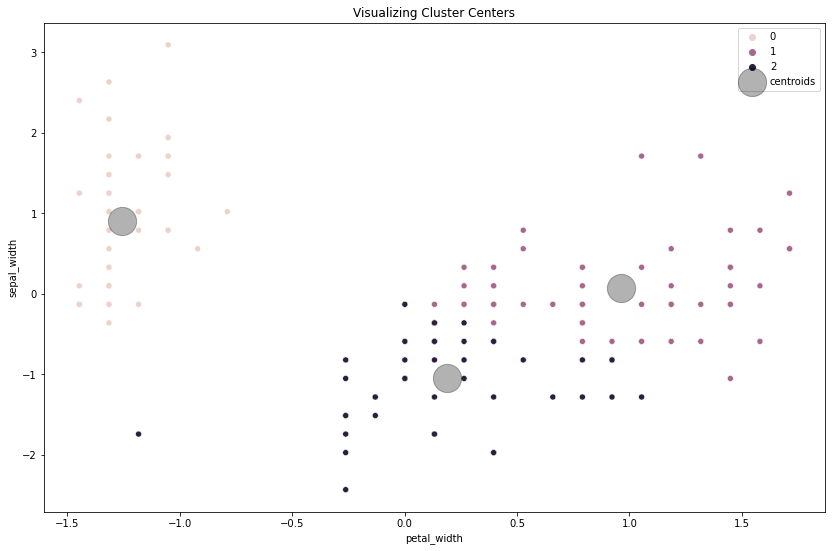

In [17]:
# visualize

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k.

In [18]:
# inertia of cluster

kmeans.inertia_

79.24744370877896

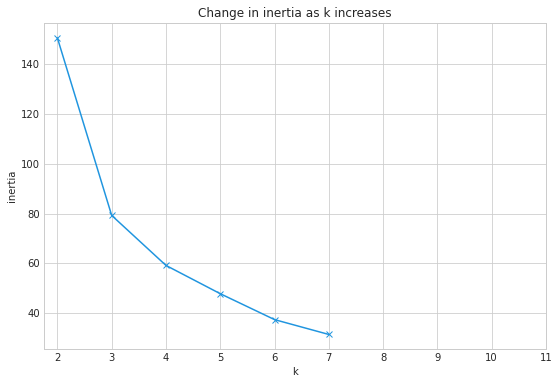

In [19]:
# visualize inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 8)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### d. Repeat the clustering, this time with 3 different features.

In [20]:
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length', 'sepal_width']]

# scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

# define the thing

kmeans = KMeans(n_clusters=3)

# fit the thing

kmeans.fit(X_scaled)

# use (predict using) the thing 

kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [21]:
# cluster centers

kmeans.cluster_centers_

array([[ 0.29645938, -0.15389144, -0.94941289],
       [-1.30310821, -1.00206653,  0.90625492],
       [ 0.94857293,  1.08926809,  0.0406681 ]])

In [22]:
# make a dataframe 

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_length,sepal_length,sepal_width
0,0.296459,-0.153891,-0.949413
1,-1.303108,-1.002067,0.906255
2,0.948573,1.089268,0.040668


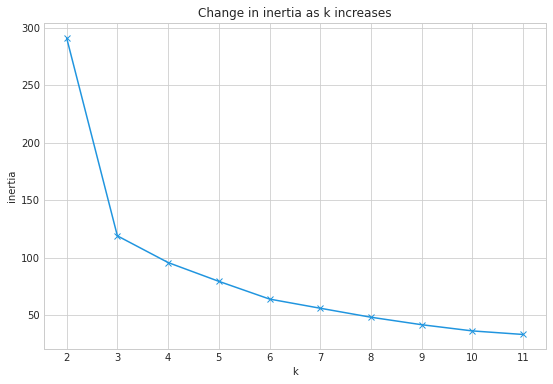

In [23]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

With three features, I would lean towards a k=3 as the elbow is a bit more prominent than it was with only 2 features, where I may have chosen a k=4.

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [24]:
df = wrangle_mall.get_mall_data()

In [25]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [26]:
# independent variables for k-means

X = df[['annual_income', 'age']]
X.head()

,annual_income,age
customer_id,,
1,15,19
2,15,21
3,16,20
4,16,23
5,17,31


In [27]:
# scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [28]:
# define the thing

kmeans = KMeans(n_clusters=4)

# fit the thing

kmeans.fit(X_scaled)

# use the thing 

kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

# check dataframe

df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [29]:
# check on the scaled dataframe
X_scaled.head()

,annual_income,age,cluster
1,-1.738999,-1.424569,1
2,-1.738999,-1.281035,1
3,-1.700830,-1.352802,1
4,-1.700830,-1.137502,1
5,-1.662660,-0.563369,1


In [30]:
# view the centroids

kmeans.cluster_centers_

array([[ 1.47377619,  0.07022883],
       [-1.17799735, -0.81371743],
       [ 0.37817285, -0.64671048],
       [-0.40624996,  1.21046483]])

In [31]:
# make a dataframe 

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,age
0,1.473776,0.070229
1,-1.177997,-0.813717
2,0.378173,-0.646710
3,-0.406250,1.210465


In [32]:
# convert cluster type to a string

df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_1
2,Male,21,15,81,cluster_1
3,Female,20,16,6,cluster_1
4,Female,23,16,77,cluster_1
5,Female,31,17,40,cluster_1


Text(0.5, 1.0, 'Clusters of Mall Customer by Annual Income and Age (scaled)')

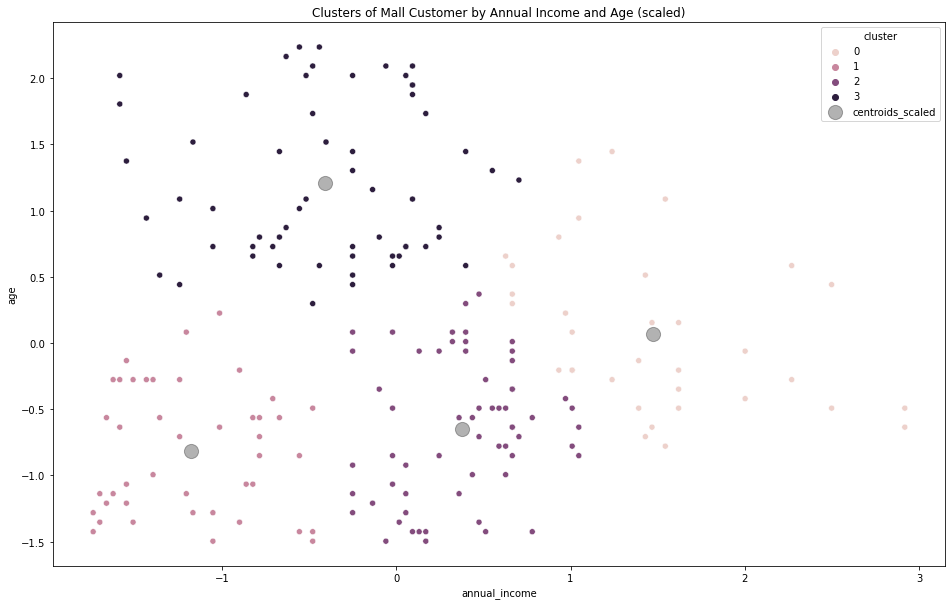

In [33]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='annual_income', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x='annual_income', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Mall Customer by Annual Income and Age (scaled)')

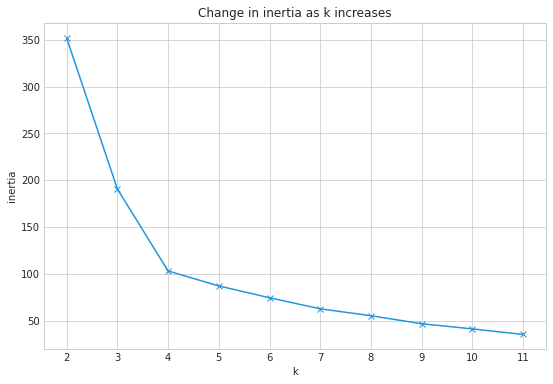

In [34]:
# plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [35]:
def create_cluster(train, X, k):
    
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # it scales the X, calcuates the clusters and return train (with clusters), Scaled dataframe
    # scaler and kmeans object and unscaled centroids as a dataframe
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

#### Visualize Clusters on unscaled data

In [36]:
X = df[['spending_score', 'age']]


In [37]:
df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 4)

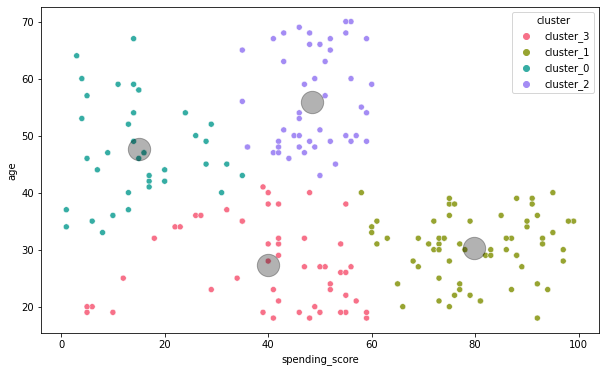

In [38]:
create_scatter_plot('spending_score','age',df, kmeans, X_scaled, scaler)

#### Visualize Clusters on Scaled Data

In [39]:
# define the thing

kmeans = KMeans(n_clusters=4)

# fit the thing

kmeans.fit(X_scaled)

# use (predict using) the thing 

kmeans.predict(X_scaled)

# make a new column names cluster on X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

# check the returned dataframe

X_scaled.head()

,spending_score,age,cluster
1,-0.434801,-1.424569,2
2,1.195704,-1.281035,0
3,-1.715913,-1.352802,2
4,1.040418,-1.137502,0
5,-0.395980,-0.563369,2


In [40]:
# make a dataframe 

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,spending_score,age
0,1.149715,-0.614157
1,-0.043998,1.254721
2,-0.393603,-0.854829
3,-1.304026,0.618156


Text(0.5, 1.0, "Clusters of Mall Customers' Spending Score By Age (scaled)")

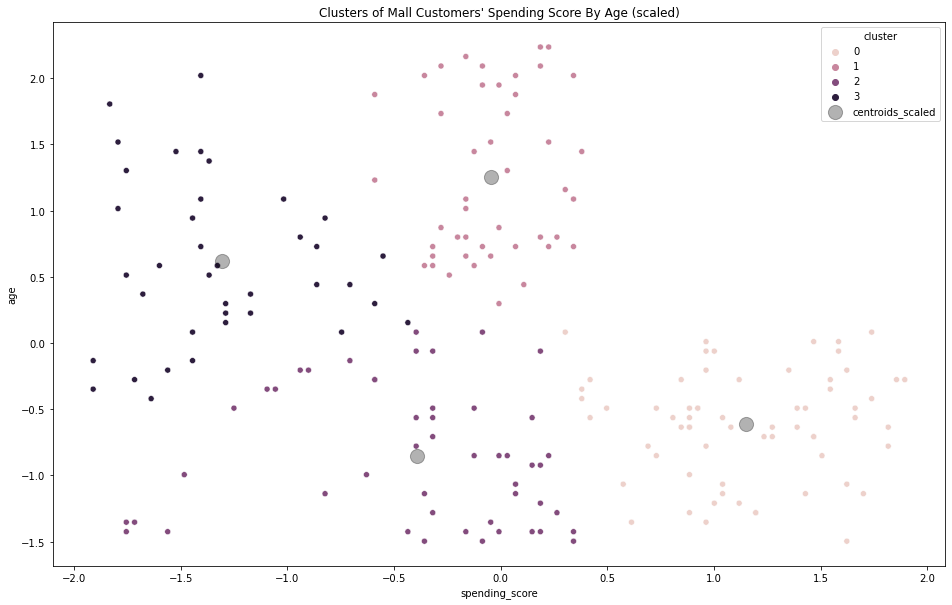

In [41]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='spending_score', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'spending_score', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title("Clusters of Mall Customers' Spending Score By Age (scaled)")

In [42]:
# set k = 4

k = 4

[Text(0.5, 1.0, 'Unscaled Data with k= 4'),
 Text(0.5, 0, 'spending score'),
 Text(0, 0.5, 'age')]

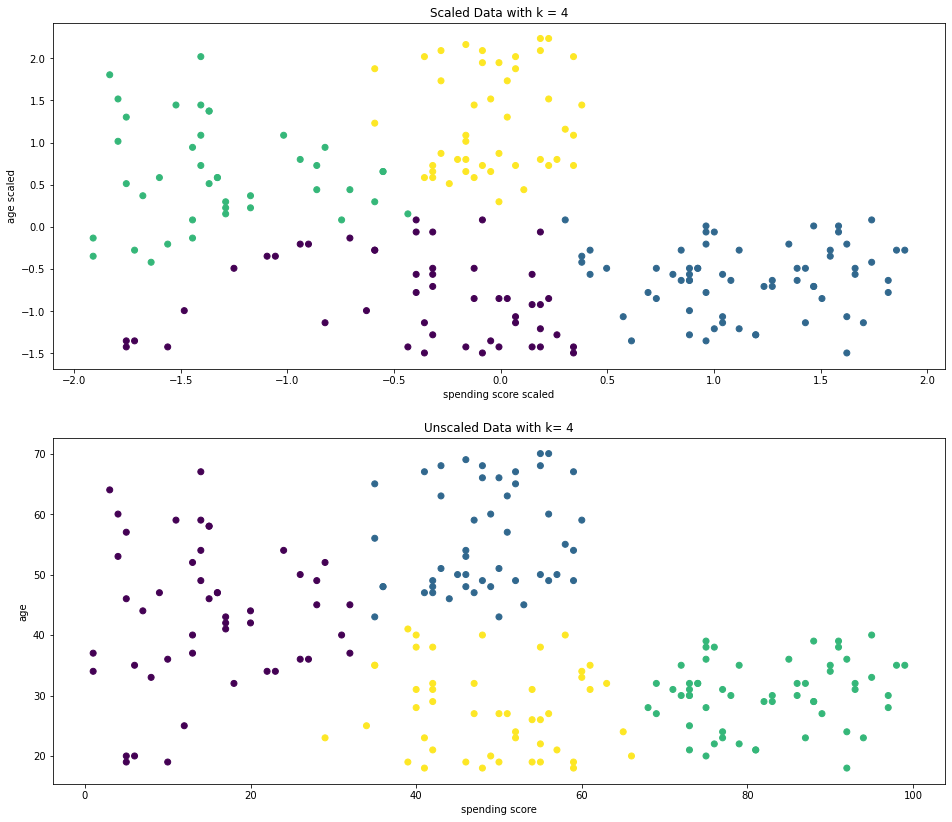

In [43]:
# visualize scaled vs unscaled clustering in a subplot

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False, sharey=False)

# plot the clusters based off scaled data

cluster1 = KMeans(k).fit(X_scaled).predict(X_scaled)
ax1.scatter(X_scaled.spending_score, X_scaled.age,c=cluster1)
ax1.set(title='Scaled Data with k = {}'.format(k), xlabel='spending score scaled', ylabel='age scaled')

# plot the clusters based off unscaled data

cluster2 = KMeans(k).fit(X).predict(X)
ax2.scatter(df.spending_score, df.age, c=cluster2)
ax2.set(title='Unscaled Data with k= {}'.format(k), xlabel='spending score', ylabel='age')

- Why is there a difference in the clusters between scaled and unscaled data?
    - Clustering is a distance based algorithm
    - Distance between points in scaled data is smaller than distance between points in unscaled data...this changes the results of the clustering.
    - So, scaling is important when the units of measures between two variables are different / extreme

### 4. Bonus

In [44]:
sheet_id = '1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M'
sheet_name = 'sheet1'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [45]:
bonus = pd.read_csv(url)

In [46]:
bonus

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


In [47]:
X = bonus[['x', 'y']]

In [48]:
bonus, X_scaled, scaler, kmeans, centroids = create_cluster(bonus, X, 4)

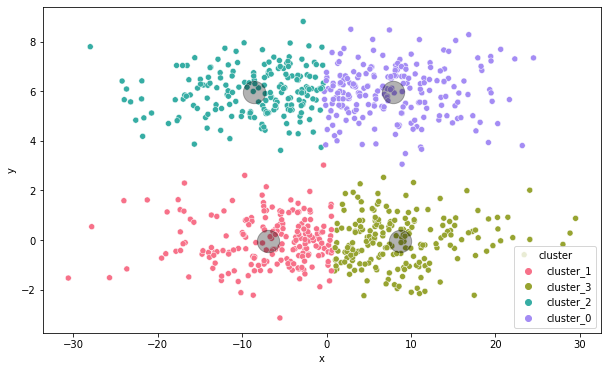

In [49]:
create_scatter_plot('x', 'y', bonus, kmeans, X_scaled, scaler)

In [50]:
# define the thing

kmeans = KMeans(n_clusters=4)

# fit the thing

kmeans.fit(X_scaled)

# use (predict using) the thing 

kmeans.predict(X_scaled)

# make a new column names cluster on X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)

# check the returned dataframe

X_scaled.head()

,x,y,cluster
0,-0.419211,-0.904027,3
1,-0.821099,-0.368472,3
2,-0.708466,-0.920978,3
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1


In [51]:
# make a dataframe 

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,x,y
0,0.735351,0.949754
1,0.825694,-0.952092
2,-0.919715,0.952677
3,-0.748910,-0.950150


Text(0.5, 1.0, 'Bonus Exercise (scaled)')

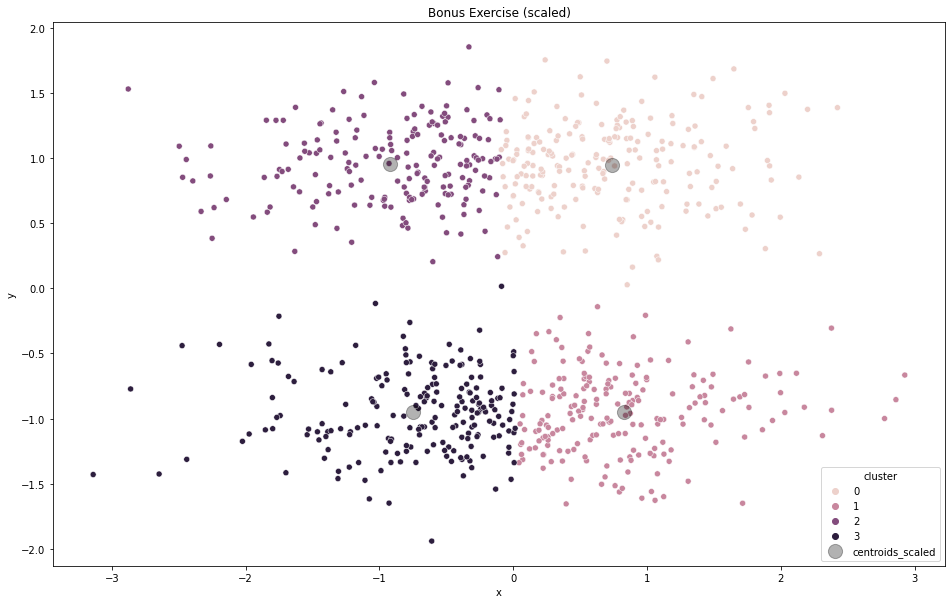

In [52]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='x', y='y', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x= 'x', y='y', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title("Bonus Exercise (scaled)")

In [53]:
# set k = 4 

k = 4

[Text(0.5, 1.0, 'Unscaled Data with k= 4'),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y')]

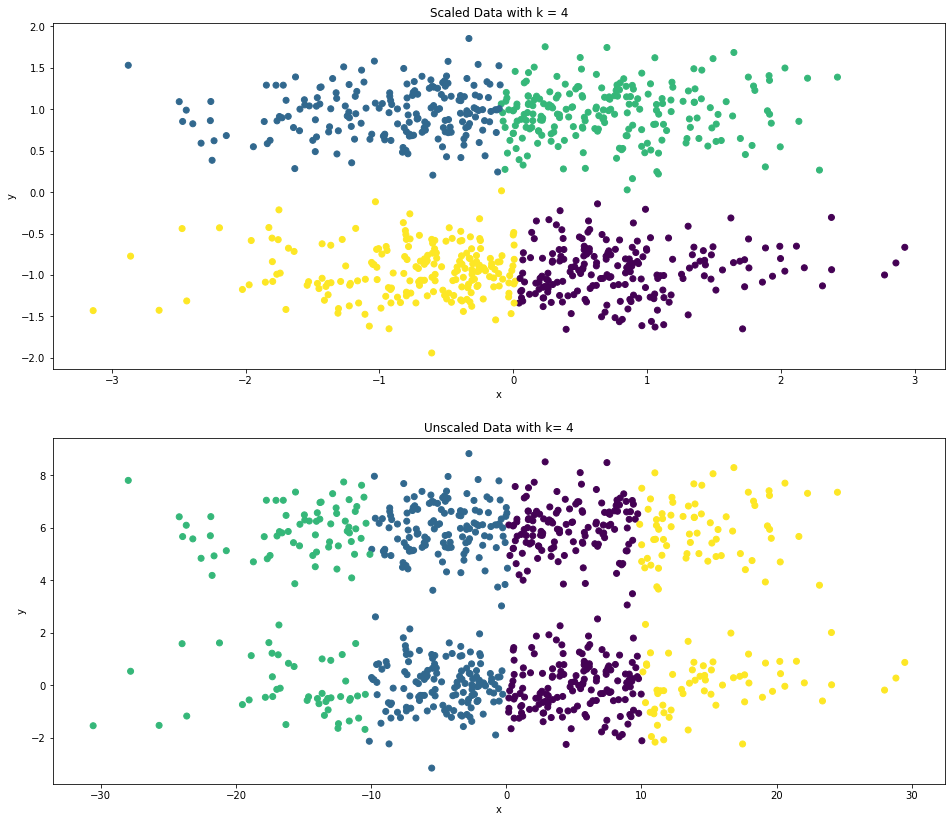

In [54]:
# visualize scaled vs unscaled clustering in a subplot

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False, sharey=False)

# plot the clusters based off scaled data

cluster1 = KMeans(k).fit(X_scaled).predict(X_scaled)
ax1.scatter(X_scaled.x, X_scaled.y,c=cluster1)
ax1.set(title='Scaled Data with k = {}'.format(k), xlabel='x', ylabel='y')

# plot the clusters based off unscaled data

cluster2 = KMeans(k).fit(X).predict(X)
ax2.scatter(bonus.x, bonus.y, c=cluster2)
ax2.set(title='Unscaled Data with k= {}'.format(k), xlabel='x', ylabel='y')